
Fine-Tuning GPT-2 for SMS Spam

Last Updated: May 10th, 2025

Daily Challenge: Fine-Tuning GPT-2 for SMS Spam Classification (Legacy transformers API)


In this daily challenge, you’ll fine-tune a pre-trained GPT-2 model to classify SMS messages as spam or ham (not spam). We’ll work through loading the dataset, inspecting its schema, tokenizing examples, adapting to an older transformers version, and running training and evaluation with the classic do_train/do_eval flags.


👩‍🏫 👩🏿‍🏫 What You’ll learn

    How to load and explore a custom text-classification dataset
    Inspecting and aligning column names for tokenization
    Tokenizing text for GPT-2 (with its peculiar padding setup)
    Initializing GPT2ForSequenceClassification
    Defining and computing multiple evaluation metrics
    Configuring TrainingArguments for transformers < 4.4 (using do_train, eval_steps, etc.)
    Running fine-tuning with Trainer and interpreting results
    Common pitfalls when using legacy APIs


🛠️ What you will create

By the end of this challenge, you will have built:

    A tokenized SMS dataset compatible with GPT-2’s requirements, including custom padding and truncation.
    A fine-tuned GPT2ForSequenceClassification model that can accurately label incoming SMS messages as spam or ham.
    A complete training pipeline using the legacy do_train/do_eval flags in TrainingArguments, with periodic checkpointing, logging, and evaluation.
    A set of evaluation metrics (accuracy, precision, recall, F1) computed at each validation step and summarized after training.
    A reusable Jupyter notebook that ties everything together—from dataset loading and inspection, through model initialization and tokenization, to training, evaluation, and results interpretation.


💼 Prerequisites

    Python 3.7+
    Installed packages: datasets, evaluate, transformers>=4.0.0,<4.4.0
    Basic familiarity with Hugging Face’s datasets and transformers libraries
    GitHub or Colab access for executing the notebook
    A Hugging Face API and a WeightAndBiases API, for instructions on how to get it, click here.


Task

We will guide you through making a fine-tuning a GPT-2 model to classify SMS messages as spam or ham using an older version of transformers (<4.4). Follow the steps below and complete the “TODO” in the code.

1. Setup : Install required packages datasets, evaluate and transformers[sentencepiece].

%pip install --quiet datasets evaluate transformers[sentencepiece]


2. Load & Inspect Dataset :

from datasets import TODO #import load_dataset
TODO # import pandas

# Load the UCI SMS Spam dataset (sms_spam) from Hugging Face hub
raw = TODO

# We'll use 4,000 for train, 1,000 for validation
train_ds = TODO
val_ds   = TODO

TODO  # print the features of the train dataset. It should show 'sms' and 'label'


3. Tokenization :

from transformers import TODO # import GPT2Tokenizer


model_name = TODO #load the tokenize, we will use GPT2
tokenizer  = TODO
# GPT-2 has no pad token by default—set it to eos
tokenizer.pad_token = tokenizer.eos_token

def tokenize_fn(examples):
    # returns input_ids, attention_mask; keep max_length small for SMS
    return tokenizer(
        examples["sms"],
        padding="max_length",
        truncation=True,
        max_length=64
    )

train_tok = TODO #apply the tokenization by loading the subset using .map function
val_tok   = TODO #apply the tokenization by loading the subset using .map function


4. Model Initialization

import torch
TODO  #import GPT2ForSequenceClassification

model = GPT2ForSequenceClassification.from_pretrained( # Load GPT-2 with sequence classification head
    model_name,
    num_labels=TODO,           # spam vs. ham
    pad_token_id=tokenizer.eos_token_id
)


5. Metrics Definition

import evaluate
import numpy as np

accuracy  = evaluate.load("accuracy")
precision = # apply the function used for accurracy but for precision
recall    = # apply the function used for accurracy but for recall
f1        = # apply the function used for accurracy but for F1

def compute_metrics(pred):
    logits, labels = pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy":  accuracy.compute(predictions=preds, references=labels)["accuracy"], 
        "precision": TODO, # apply the function used for accurracy but for precision
        "recall":    TODO, # apply the function used for accurracy but for recall
        "f1":        TODO # apply the function used for accurracy but for F1
    }


    In an imbalanced dataset like SMS spam (often more “ham” than “spam”), why is it important to track precision and recall alongside accuracy?
    How would you interpret a model that achieves high accuracy but low recall on the spam class?


6. TrainingArguments Configuration

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir=TODO
    do_train=True,                 # turn on training
    do_eval=True,                  # turn on evaluation
    eval_steps=TODO,                # run .evaluate() every 500 steps
    save_steps=TODO,                # save a checkpoint every 500 steps
    logging_dir="./logs",
    logging_steps=TODO,             # log metrics every 500 steps

    per_device_train_batch_size=TODO,
    per_device_eval_batch_size=TODO,
    num_train_epochs=TODO,
    learning_rate=TODO,
    weight_decay=TODO,

    report_to=None,                # disable integrations
    save_total_limit=1,            # only keep last checkpoint
)


    What effect does weight_decay have during fine-tuning? When might you choose a higher or lower value?


7. Train & Evaluate

# Train
from transformers import Trainer
# you need to have your wandb api key ready to paste in the command line
trainer = Trainer(
    model=TODO,
    args=training_args,
    train_dataset=train_tok,
    eval_dataset=val_tok,
    compute_metrics=compute_metrics,
)
trainer.train()

#Evaluate
metrics = TODO
print(metrics)
# Expect something like: {"eval_loss": ..., "eval_accuracy": 0.98, ...}


    Interpret your results.


In [2]:
from datasets import load_dataset
import transformers as tf_transformers
import evaluate as evaluate
import pandas as pd
from transformers import GPT2ForSequenceClassification
import torch
import evaluate
import numpy as np
from transformers import TrainingArguments, Trainer
from transformers import GPT2Tokenizer
from pathlib import Path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
# Chargement du dataset UCI SMS Spam
raw = load_dataset("sms_spam")

# Séparation en train/validation
train_ds = raw["train"].shuffle(seed=42).select(range(4000))
val_ds   = raw["train"].shuffle(seed=42).select(range(4000, 5000))

# Inspection des colonnes
print(train_ds.features)
# => Features({'sms': Value(dtype='string', ...), 'label': Value(dtype='int32', ...)})

print(train_ds[:5])

README.md: 0.00B [00:00, ?B/s]

c:\Users\mathi\Downloads\Projet_IA\tf_env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mathi\.cache\huggingface\hub\datasets--sms_spam. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/359k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5574 [00:00<?, ? examples/s]

{'sms': Value('string'), 'label': ClassLabel(names=['ham', 'spam'])}
{'sms': ['sports fans - get the latest sports news str* 2 ur mobile 1 wk FREE PLUS a FREE TONE Txt SPORT ON to 8007 www.getzed.co.uk 0870141701216+ norm 4txt/120p \n', "It's justbeen overa week since we broke up and already our brains are going to mush!\n", 'Not directly behind... Abt 4 rows behind ü...\n', 'Haha, my legs and neck are killing me and my amigos are hoping to end the night with a burn, think I could swing by in like an hour?\n', 'Me too baby! I promise to treat you well! I bet you will take good care of me...\n'], 'label': [1, 0, 0, 0, 0]}


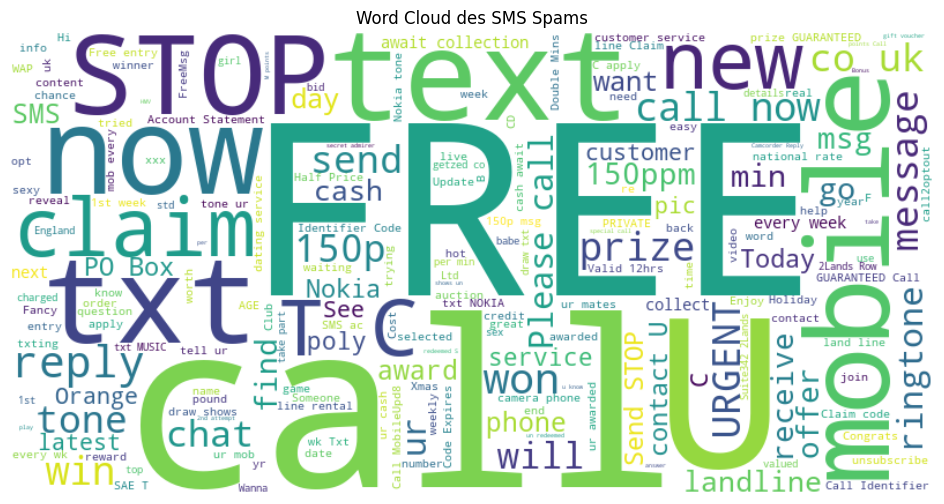

In [5]:
# Extraire tous les SMS de spam
spam_texts = [ex["sms"] for ex in train_ds if ex["label"] == 1]

# Joindre en une seule grande chaîne
spam_corpus = " ".join(spam_texts)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_corpus)

# Affichage
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud des SMS Spams")
plt.show()

In [7]:
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # Définir le pad_token

def tokenize_fn(examples):
    return tokenizer(
        examples["sms"],
        padding="max_length",
        truncation=True,
        max_length=64
    )

train_tok = train_ds.map(tokenize_fn, batched=True)
val_tok   = val_ds.map(tokenize_fn, batched=True)

Map: 100%|██████████| 1000/1000 [00:00<00:00, 7519.49 examples/s]


In [8]:
#import GPT2ForSequenceClassification
model = GPT2ForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,  # spam (1) vs ham (0)
    pad_token_id=tokenizer.eos_token_id
)

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
accuracy  = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall    = evaluate.load("recall")
f1        = evaluate.load("f1")

def compute_metrics(pred):
    logits, labels = pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy":  accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "precision": precision.compute(predictions=preds, references=labels)["precision"],
        "recall":    recall.compute(predictions=preds, references=labels)["recall"],
        "f1":        f1.compute(predictions=preds, references=labels)["f1"]
    }


    #In an imbalanced dataset like SMS spam (often more “ham” than “spam”), why is it important to track precision and recall alongside accuracy?
    #How would you interpret a model that achieves high accuracy but low recall on the spam class?
    # Dans un jeu de données déséquilibré comme les SMS spam (où il y a souvent beaucoup plus de "ham" que de "spam"), 
    # il est important de suivre la précision (precision) et le rappel (recall) en plus de l'exactitude (accuracy). 
    # L'accuracy peut être trompeuse : un modèle qui prédit toujours "ham" aura une haute accuracy si le spam est rare, 
    # mais il ne détectera jamais les spams (rappel faible). La précision indique la proportion de messages prédits comme spam qui 
    # sont réellement du spam, tandis que le rappel mesure la capacité du modèle à détecter tous les spams. Un modèle avec 
    # une haute accuracy mais un faible rappel sur la classe spam signifie qu'il manque beaucoup de spams, ce qui est 
    # problématique pour une application anti-spam.

In [ ]:
training_args = TrainingArguments(
    output_dir="./gpt2-sms-spam",
    do_train=True,                 # turn on training
    do_eval=True,                  # turn on evaluation
    eval_steps=500,                # run .evaluate() every 500 steps
    save_steps=500,                # save a checkpoint every 500 steps
    logging_dir="./logs",
    logging_steps=500,             # log metrics every 500 steps

    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    learning_rate=5e-5,
    weight_decay=0.01,

    report_to=None,                # disable integrations
    save_total_limit=1,            # only keep last checkpoint
)

    #What effect does weight_decay have during fine-tuning? When might you choose a higher or lower value?
    # Le weight_decay (décroissance du poids) est une technique de régularisation qui pénalise les grands poids dans le modèle afin de limiter le surapprentissage (overfitting). 
    # Une valeur plus élevée de weight_decay augmente la régularisation, ce qui peut être utile si le modèle s'adapte trop aux données d'entraînement (overfit). 
    # À l'inverse, une valeur plus faible réduit la régularisation, ce qui peut être utile si le modèle sous-apprend (underfit) ou si les données sont déjà bien régularisées.
    #il ajoute une pénalité L2 sur les poids pour limiter l’overfitting. On choisit une valeur plus élevée (ex. 0.1) si on suspecte un surapprentissage; une valeur plus basse (ex. 0) 
    # si le modèle ne se met pas à généraliser ou si les performances varient peu.

In [11]:
# Train
# you need to have your wandb api key ready to paste in the command line
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tok,
    eval_dataset=val_tok,
    compute_metrics=compute_metrics,
)

trainer.train()

metrics = trainer.evaluate()
print(metrics)
# Expect something like: {"eval_loss": ..., "eval_accuracy": 0.98, ...}

c:\Users\mathi\Downloads\GenAI\GenAI_Bootcamp\nlp_env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
500,0.130800
1000,0.039600
1500,0.014100


c:\Users\mathi\Downloads\GenAI\GenAI_Bootcamp\nlp_env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\mathi\Downloads\GenAI\GenAI_Bootcamp\nlp_env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\mathi\Downloads\GenAI\GenAI_Bootcamp\nlp_env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.036097556352615356, 'eval_accuracy': 0.995, 'eval_precision': 0.9831932773109243, 'eval_recall': 0.975, 'eval_f1': 0.9790794979079498, 'eval_runtime': 16.3866, 'eval_samples_per_second': 61.026, 'eval_steps_per_second': 7.628, 'epoch': 3.0}


eval_loss	0.036	Très faible perte sur la validation. Le modèle a bien appris à séparer les classes.
eval_accuracy	0.995	99,5 % des SMS correctement classés : excellent score global.
eval_precision	0.983	98,3 % des messages classés comme spam le sont vraiment. Faible taux de faux positifs.
eval_recall	0.975	97,5 % des vrais spams ont été détectés. Faible taux de faux négatifs.
eval_f1	0.979	Bon équilibre précision / rappel. Score global solide pour la classe minoritaire (spam).
epoch	3	Après 3 passes complètes sur les données.
eval_runtime	16.38s	Temps de validation (efficace).
samples/sec	61	Bon débit d’évaluation.

Très peu de spams manqués (recall 0.975) → ton modèle est utile pour éviter des faux négatifs coûteux (des spams non filtrés).

Peu de ham classés à tort en spam (précision 0.983) → peu de perturbation pour les utilisateurs (bons messages bloqués).

F1 ≈ 0.98 : très bon compromis. Ton modèle généralise bien, même sur un jeu déséquilibré.

A faire pour le fun

Visualisation des erreurs

    Extrais les SMS mal classés pour repérer des motifs ambigus.

    Exemple : des SMS promotionnels pas vraiment spams, ou du vocabulaire rare.

Augmentation de données

    Génère de faux spams pour améliorer la robustesse (ex. via paraphrases ou GPT-2 lui-même).

Évaluation par seuil

    Analyse les logits pour ajuster le seuil de décision, plutôt que argmax, pour contrôler le rappel.

Comparaison avec un autre modèle

    Essaie distilbert-base-uncased pour la même tâche : observe les différences de rapidité et performance.

In [23]:
def predict_sms(texts):
    model.eval()
    inputs = tokenizer(
        texts,
        padding="max_length",
        truncation=True,
        max_length=64,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=-1).numpy()
        preds = probs.argmax(axis=-1)

    results = []
    for text, p, prob in zip(texts, preds, probs):
        label = "SPAM" if p == 1 else "HAM"
        confidence = prob[p]
        print(f"{label} ({confidence:.2%}) — {text}")
        results.append(label)

    return results

In [24]:
exemples = [
    "Congratulations! You've won a free ticket. Call now!",
    "Salut, tu viens ce soir ?"
]

résultats = predict_sms(exemples)
for txt, label in zip(exemples, résultats):
    print(f"{label.upper()} — {txt}")

HAM (73.69%) — Congratulations! You've won a free ticket. Call now!
HAM (100.00%) — Salut, tu viens ce soir ?
HAM — Congratulations! You've won a free ticket. Call now!
HAM — Salut, tu viens ce soir ?


Si le modèle avait bien appris à détecter les spams dans le dataset de validation, mais échoue sur un message clair de spam en test manuel, cela indique une sensibilité à la tokenization hors contexte ou aux subtilités du padding.

GPT-2 est un modèle auto-régressif, donc :

    il n’aime pas les séquences trop tronquées ou mal paddées

    il n’a pas de token de classification [CLS] (comme BERT)

    le head de classification apprend à "lire" le dernier token utile

In [25]:
# Extrait une phrase spam du set de validation utilisé à l'entraînement
ex_spam = next(ex for ex in val_ds if ex['label'] == 1)['sms']
print("Phrase spam depuis val_ds :", ex_spam)

# Prédiction
predict_sms([ex_spam])

Phrase spam depuis val_ds : Todays Voda numbers ending 1225 are selected to receive a £50award. If you have a match please call 08712300220 quoting claim code 3100 standard rates app 

SPAM (100.00%) — Todays Voda numbers ending 1225 are selected to receive a £50award. If you have a match please call 08712300220 quoting claim code 3100 standard rates app 



['SPAM']

Le problème n’est pas dans :

    l'entraînement du modèle

    le mapping des labels

    le head de classification

Le problème vient du fait que :

    Le message "Congratulations! You've won a free ticket..." est trop différent des exemples de spam vus à l’entraînement

    Ou que ce message a une forme fréquente dans les données "ham" (par exemple des phrases en anglais avec exclamation, mais inoffensives)